Having looked at the provided data, it reveals that with over 22,552 listings as of November 2018 with a size of 891 km², there are roughly 25 homes being rented out per km² in Berlin on Airbnb! So Berlin is one of the hottest destinations for Airbnb.

How big is the request for accommodation in Berlin?
What affects the Airbnb requests in Berlin?
occupation and revenue expectation

In this project, the "summary listings" and the "detailed Berlin listings" data are combined. The goal is to visualize the rental situation and to understand the items that affects the customer request.

In [1]:
# import required libraries
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load provided data
df_reviews = pd.read_csv('reviews_summary.csv')

df_listing = pd.read_csv('listings_summary.csv')

In [3]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [4]:
# drop unnecessary columns
df_reviews.drop(['reviewer_id', 'reviewer_name', 'comments'], axis=1, inplace=True)

# rename id column. Replace current value with 1 for later count the number of reviews per accommodation
df_reviews.rename({'id':'review_count'}, axis=1, inplace=True)
df_reviews.review_count = 1

df_reviews.head()

,listing_id,review_count,date
0,2015,1,2016-04-11
1,2015,1,2016-04-15
2,2015,1,2016-04-26
3,2015,1,2016-05-10
4,2015,1,2016-05-14


In [5]:
# checking shape and duplicates
print("The reviews_summary has {} rows and {} columns.".format(*df_reviews.shape))
print("It contains {} duplicates.".format(df_reviews.duplicated().sum()))


The reviews_summary has 401963 rows and 3 columns.
It contains 1242 duplicates.


#### Understanding the Provided Data

In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401963 entries, 0 to 401962
Data columns (total 3 columns):
listing_id      401963 non-null int64
review_count    401963 non-null int64
date            401963 non-null object
dtypes: int64(2), object(1)
memory usage: 9.2+ MB


In [7]:
# date-column is string so needed to be changed to datetime datatype
df_reviews.date = pd.to_datetime(df_reviews.date, format="%Y-%m-%d")

In [8]:
# arrange data set for a full year starting November 1st, 2017 and ending October 31st, 2018
count_2017_18 = df_reviews[df_reviews["date"].isin(pd.date_range('2017-11-01', '2018-10-31'))]
print("The new data set 2017-2018 has {} reviews and {} columns.".format(*count_2017_18.shape))

The new data set 2017-2018 has 165873 reviews and 3 columns.


In [9]:
# set the date as index and then sort by index
count_2017_18 = count_2017_18.set_index('date').sort_index()

In [10]:
# group by month and listing_id for a specific apartment 
count_2017_18_monthly = count_2017_18.groupby([pd.TimeGrouper(freq='M'), 'listing_id'])['review_count']\
                                         .agg({'review_count':{'reviews_per_month':'count'}})\
                                         .reset_index()

In [11]:
count_2017_18_monthly.head()

,date,listing_id,review_count
,,,reviews_per_month
0,2017-11-30,3309,1
1,2017-11-30,7071,2
2,2017-11-30,17409,3
3,2017-11-30,17904,3
4,2017-11-30,22415,2


In [12]:
# define column names
count_2017_18_monthly.columns = ['date', 'listing_id', 'reviews_per_month']

# set date as index
count_2017_18_monthly.set_index('date', inplace=True)

# check the dara set
count_2017_18_monthly.head()

,listing_id,reviews_per_month
date,,
2017-11-30,3309,1
2017-11-30,7071,2
2017-11-30,17409,3
2017-11-30,17904,3
2017-11-30,22415,2


In [13]:
# group by listing_id and count reviews, a dataframe without groupby index
count_2017_18_monthly = pd.DataFrame(count_2017_18_monthly.groupby('listing_id')['reviews_per_month'].mean()\
                                                          .reset_index())

count_2017_18_monthly.head()

,listing_id,reviews_per_month
0,2015,2.888889
1,2695,2.000000
2,3309,1.000000
3,7071,3.454545
4,9991,1.000000


Till now we had count of reviews per listing. We will use the second dataset to get more ..

In [14]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


#### We just need some of the listing dataset columns to answer our questions.

In [15]:
# merge 2017-2018 dataframe and some specific columns from listing dataframe
df = pd.merge(count_2017_18_monthly, df_listing[['id', 'price', 'cleaning_fee', 'neighbourhood_group_cleansed', 
                          'latitude', 'longitude', 'property_type', 'accommodates', 
                          'bathrooms', 'bedrooms', 'bed_type', 'host_is_superhost']], 
              left_on='listing_id', right_on='id')

# drop 'id' from right dataframe (reviews) as it's the same as 'listing_id' on the left dataframe (listing)
df.drop(['id'], axis=1, inplace=True)

# shorten the name of one column
df.rename({'neighbourhood_group_cleansed':'neighbourhood'}, axis=1, inplace=True)

# check the dataframe
print("The dataset has {} rows and {} columns - after merging.".format(*df.shape))
print("It contains {} duplicates.".format(df.duplicated().sum()))

df.head()

The dataset has 13609 rows and 13 columns - after merging.
It contains 0 duplicates.


,listing_id,reviews_per_month,price,cleaning_fee,neighbourhood,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,bed_type,host_is_superhost
0,2015,2.888889,$60.00,$30.00,Mitte,52.534537,13.402557,Guesthouse,3,1.0,1.0,Real Bed,t
1,2695,2.000000,$17.00,$0.00,Pankow,52.548513,13.404553,Apartment,2,1.0,1.0,Real Bed,f
2,3309,1.000000,$26.00,$30.00,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,2,1.0,1.0,Pull-out Sofa,f
3,7071,3.454545,$42.00,$0.00,Pankow,52.543157,13.415091,Apartment,2,1.0,1.0,Real Bed,t
4,9991,1.000000,$180.00,$80.00,Pankow,52.533031,13.416047,Apartment,7,2.5,4.0,Real Bed,f


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13609 entries, 0 to 13608
Data columns (total 13 columns):
listing_id           13609 non-null int64
reviews_per_month    13609 non-null float64
price                13609 non-null object
cleaning_fee         10794 non-null object
neighbourhood        13609 non-null object
latitude             13609 non-null float64
longitude            13609 non-null float64
property_type        13609 non-null object
accommodates         13609 non-null int64
bathrooms            13596 non-null float64
bedrooms             13601 non-null float64
bed_type             13609 non-null object
host_is_superhost    13607 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 1.5+ MB


As it's obviouse, price and cleaning_fee are both string columns

In [17]:
# convert price column to integer value
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)

# check the nan values
df.price.isna().sum()

0

In [18]:
# replace missing values with zero and convert cleaning_fee column to integer
df.cleaning_fee.fillna('$0.00', inplace=True)
df.cleaning_fee = df.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float).astype(int)

# check the nan values
df.cleaning_fee.isna().sum()

0

In [19]:
# now investigate price column
df['price'].describe()

count    13609.000000
mean        65.109045
std        158.996457
min          0.000000
25%         33.000000
50%         49.000000
75%         73.000000
max       8600.000000
Name: price, dtype: float64

Nice information about the prices. But some visualization..

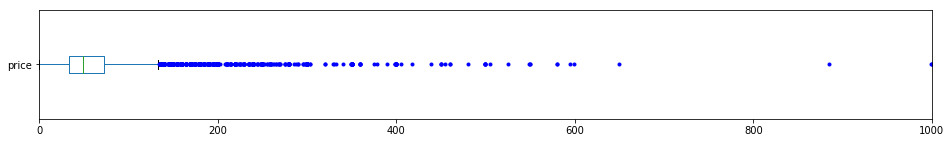

In [20]:
# boxplot of price
square = dict(markerfacecolor='b', markeredgecolor='b', marker='.')
df['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=square, figsize=(16,2));

This boxplot reveals quite a skewed distribution with a tail of high-priced outliers. However, 75% of the prices are around 70 Euro. For this project, we need to remove the high prices above €300 to maintain comparability.

In [21]:
# drop the prices over 300 Euro
df.drop(df[df['price'] > 300].index, axis=0, inplace=True)
df['price'].describe()

count    13526.000000
mean        59.243457
std         40.413352
min          0.000000
25%         33.000000
50%         49.000000
75%         70.000000
max        300.000000
Name: price, dtype: float64

Based on my researches, Airbnb says, guests who booked to stay in Berlin in 2017, spent 4.2 nights on average.
As one of our questions is how big is the market of accommodation request in Berlin, we need to calculate the Occupancy Rate per Month. And here is the formula:
Occupancy Rate per Month = Average Stay Length * (Number of reviews per Month / Review Rate)

To have a real estimation about the occupacy rate, we have designed to scenarios. A conservative estimate and an optimestic estimate. And to have these estimations we need to have a Review Rate.

#### Conservative estimate

In [22]:
avg_length_of_stay_berlin = 4.2
review_rate_modest = 0.5

# calculate the occupancy and round the result
df['conservative_occupancy'] = round(avg_length_of_stay_berlin * (df['reviews_per_month']/review_rate_modest), 2)
len(df[df['conservative_occupancy'] > 100])

4

In [23]:
# drop occupancy rates > 100
df.drop(df[(df['conservative_occupancy'] > 100)].index, axis=0, inplace=True)

df['conservative_occupancy'].describe()

count    13522.000000
mean        17.885419
std         11.570805
min          8.400000
25%          8.400000
50%         14.000000
75%         22.400000
max         98.700000
Name: conservative_occupancy, dtype: float64

#### Optimistic Estimate

In [24]:
review_rate_optimistic = 0.4

# calculate the occupancy and round the result
df['optimistic_occupancy'] = round(avg_length_of_stay_berlin * (df['reviews_per_month']/review_rate_optimistic), 2)

len(df[df['optimistic_occupancy'] > 100])

13

In [25]:
# drop the occupancy rates > 100
df.drop(df[(df['optimistic_occupancy'] > 100)].index, axis=0, inplace=True)

df['optimistic_occupancy'].describe()

count    13509.000000
mean        22.274628
std         14.224291
min         10.500000
25%         10.500000
50%         17.500000
75%         28.000000
max         99.750000
Name: optimistic_occupancy, dtype: float64

#### Comparing Occupancy Estimates by visualization

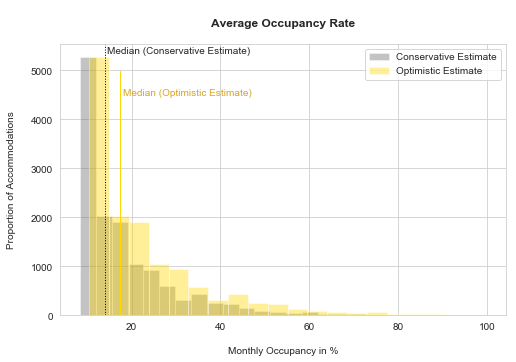

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df['conservative_occupancy'], kde=False, bins=20, color='dimgrey')
sns.distplot(df['optimistic_occupancy'], kde=False, bins=20, color='gold')

plt.title('\nAverage Occupancy Rate\n', fontweight='bold')
plt.legend(['Conservative Estimate', 'Optimistic Estimate'])
plt.xlabel('\nMonthly Occupancy in %')
plt.ylabel('Proportion of Accommodations\n')

# draw a line with median value of conservative estimate
plt.axvline(x=14, ymin=0, ymax=1, linewidth=1, linestyle=':', color='black')
plt.text(14.5, 5350, 'Median (Conservative Estimate)')

# draw a line with median value of optimistic estimate
plt.axvline(x=17.5, ymin=0, ymax=0.9, linewidth=1, linestyle='-', color='gold')
plt.text(18, 4500, 'Median (Optimistic Estimate)', color='goldenrod');

Would be great to calculate the total income per year for both scenarios. The formula is:  Income per year = Monthly Occupancy Rate * Price * 12 Months

In [27]:
df['conservative_income'] = df['conservative_occupancy'] * df['price'] * 12
df.conservative_income.describe()

count     13509.000000
mean      12711.697002
std       13078.961619
min           0.000000
25%        5040.000000
50%        8709.120000
75%       15120.000000
max      241113.600000
Name: conservative_income, dtype: float64

In [28]:
df['optimistic_income'] = df['optimistic_occupancy'] * df['price'] * 12
df.optimistic_income.describe()

count     13509.000000
mean      15889.597273
std       16348.762861
min           0.000000
25%        6300.000000
50%       10886.400000
75%       18900.000000
max      301392.000000
Name: optimistic_income, dtype: float64

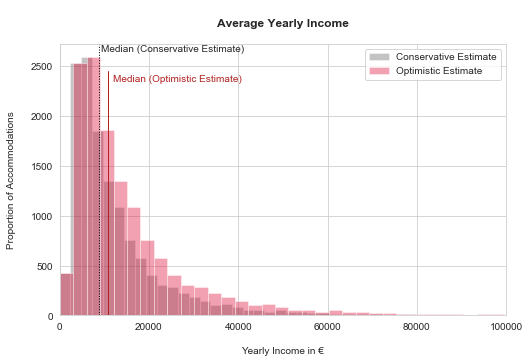

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df['conservative_income'], kde=False, bins=100, color='dimgrey')
sns.distplot(df['optimistic_income'], kde=False, bins=100, color='crimson')

plt.title('\nAverage Yearly Income\n', fontweight='bold')
plt.legend(['Conservative Estimate', 'Optimistic Estimate'])
plt.xlabel('\nYearly Income in €')
plt.xlim((0,100000))
plt.ylabel('Proportion of Accommodations\n')

# draw a line with median value of conservative estimate
plt.axvline(x=8709, ymin=0, ymax=1, linewidth=1, linestyle=':', color='black')
plt.text(9350, 2650, 'Median (Conservative Estimate)')

# draw a line with median value of optimistic estimate
plt.axvline(x=10886, ymin=0, ymax=0.9, linewidth=1, linestyle='-', color='firebrick')
plt.text(12000, 2350, 'Median (Optimistic Estimate)', color='firebrick');

### Exploratory Data Analysis (EDA)

#### 1- Heat Map. Heat Map is a very good start for EDA

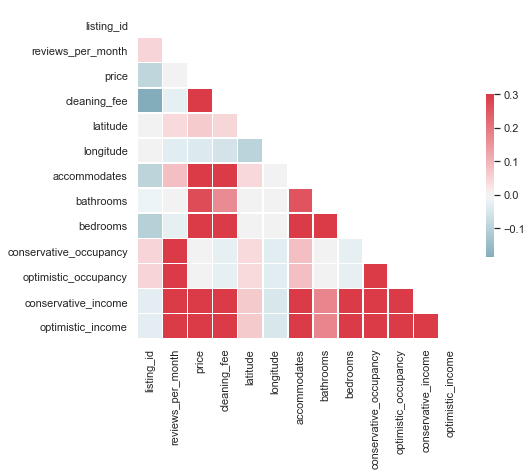

In [30]:
sns.set(style="white")
corr = df.corr()

# generate a mask for the upper triangle to visualize output more readable
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5});

We should note to:

1- The number of people that can be accommodated as an indicator for size or capacity and
2- The latitude as a proxy for location may help explaining the demand.
(The feature reviews_per_month is what we used to estimate the occupancy, so no wonder the correlation is a vivid red.)

We assume there might be also some seasonality that strongly influences the demand. Furthermore, we believe that the so-called super host status does benefit these hosts, who probably get far more guests than standard hosts. 

As the heat map only uses numeric columns, it can't show any such relationship — so we need to check all of these factors to visually investigate their effect on demand:

#### 2- Check the Seasonal Demand

To examine if there's an underlying seasonality, let's split the dataset we loaded at the very beginning by year. We'll repeat the exact same steps we used earlier to pull out the full calendar year.

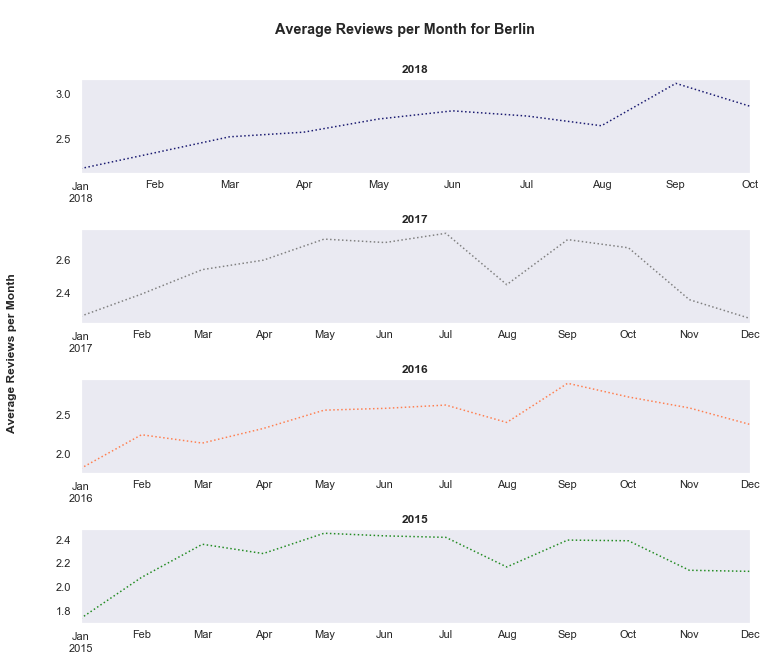

In [31]:
# split by date
count_2018 = df_reviews[df_reviews["date"].isin(pd.date_range('2018-01-01', '2018-10-31'))]
count_2017 = df_reviews[df_reviews["date"].isin(pd.date_range('2017-01-01', '2017-12-31'))]
count_2016 = df_reviews[df_reviews["date"].isin(pd.date_range('2016-01-01', '2016-12-31'))]
count_2015 = df_reviews[df_reviews["date"].isin(pd.date_range('2015-01-01', '2015-12-31'))]

# set the date as index and sort by index
count_2018 = count_2018.set_index('date').sort_index()
count_2017 = count_2017.set_index('date').sort_index()
count_2016 = count_2016.set_index('date').sort_index()
count_2015 = count_2015.set_index('date').sort_index()

# estimate reviews per month                       
count_2018_monthly = count_2018.groupby([pd.TimeGrouper(freq='M'), 'listing_id'])['review_count']\
                                         .agg({'review_count':{'reviews_per_month_18':'count'}})\
                                         .reset_index()
count_2017_monthly = count_2017.groupby([pd.TimeGrouper(freq='M'), 'listing_id'])['review_count']\
                                         .agg({'review_count':{'reviews_per_month_17':'count'}})\
                                         .reset_index()
count_2016_monthly = count_2016.groupby([pd.TimeGrouper(freq='M'), 'listing_id'])['review_count']\
                                         .agg({'review_count':{'reviews_per_month_16':'count'}})\
                                         .reset_index()
count_2015_monthly = count_2015.groupby([pd.TimeGrouper(freq='M'), 'listing_id'])['review_count']\
                                         .agg({'review_count':{'reviews_per_month_15':'count'}})\
                                         .reset_index()

# flatten the multi-index
count_2018_monthly.columns = ['date', 'listing_id', 'reviews_per_month_18']
count_2017_monthly.columns = ['date', 'listing_id', 'reviews_per_month_17']
count_2016_monthly.columns = ['date', 'listing_id', 'reviews_per_month_16']
count_2015_monthly.columns = ['date', 'listing_id', 'reviews_per_month_15']

# set date as index
count_2018_monthly.set_index('date', inplace=True)
count_2017_monthly.set_index('date', inplace=True)
count_2016_monthly.set_index('date', inplace=True)
count_2015_monthly.set_index('date', inplace=True)


sns.set(style="dark")
fig, axes = plt.subplots(4, 1, figsize=(12,10))

sub_1 = count_2018_monthly.groupby('date')['reviews_per_month_18'].mean()
sub_1.plot(ax=axes[0], color='midnightblue', style=':')
axes[0].set_title('2018', fontweight='bold')
axes[0].set_xlabel('') 

sub_2 = count_2017_monthly.groupby('date')['reviews_per_month_17'].mean()
sub_2.plot(ax=axes[1], color='grey', style=':')
axes[1].set_title('2017', fontweight='bold')
axes[1].set_xlabel('') 

sub_3 = count_2016_monthly.groupby('date')['reviews_per_month_16'].mean()
sub_3.plot(ax=axes[2], color='coral', style=':')
axes[2].set_title('2016', fontweight='bold')
axes[2].set_xlabel('') 

sub_4 = count_2015_monthly.groupby('date')['reviews_per_month_15'].mean()
sub_4.plot(ax=axes[3], color='forestgreen', style=':')
axes[3].set_title('2015', fontweight='bold')
axes[3].set_xlabel('') 

plt.subplots_adjust(hspace = 0.6)
plt.suptitle('\nAverage Reviews per Month for Berlin\n', fontweight='bold')

fig.text(0.04, 0.5, 'Average Reviews per Month', fontweight='bold', va='center', rotation='vertical');

Note that the plot for 2018 only ranges from January to October!

Having said that, we can see the same pattern each and every year: the visitors peak from May to July, and then again in September and October. It drops significantly during August and the winter months. The pattern in August is also interesting: tourists seem to avoid city trips in the, liekely preferring to go on beach holidays.

#### 3- Demand by Status SUPERHOST

In [32]:
# check super host column for NaN values
df.host_is_superhost.isna().sum()

2

In [33]:
# replace NaN's with value 'false' for not being a superhost
df.host_is_superhost.fillna(value='f', inplace=True)
df.host_is_superhost.isna().sum()

0

What do the differences between super hosts and standard hosts look like?

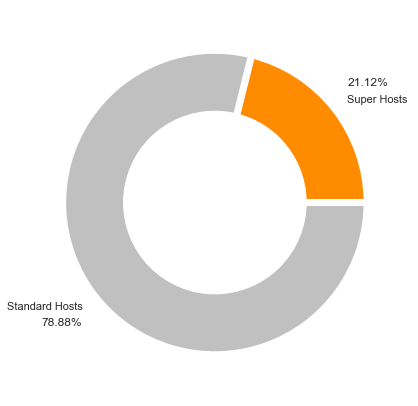

In [38]:
# assign the data
super_host    = df.host_is_superhost.value_counts()['t']
no_super_host = df.host_is_superhost.value_counts()['f']
names = ['Super Hosts','Standard Hosts']
size  = [super_host, no_super_host]

# create a pie chart
plt.pie(size, labels=names, colors=['darkorange','silver'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create center circle to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [47]:
# the overall median differences between superhosts and standard hosts
df.groupby('host_is_superhost')['conservative_occupancy'].agg(np.median)

host_is_superhost
f    12.6
t    21.0
Name: conservative_occupancy, dtype: float64

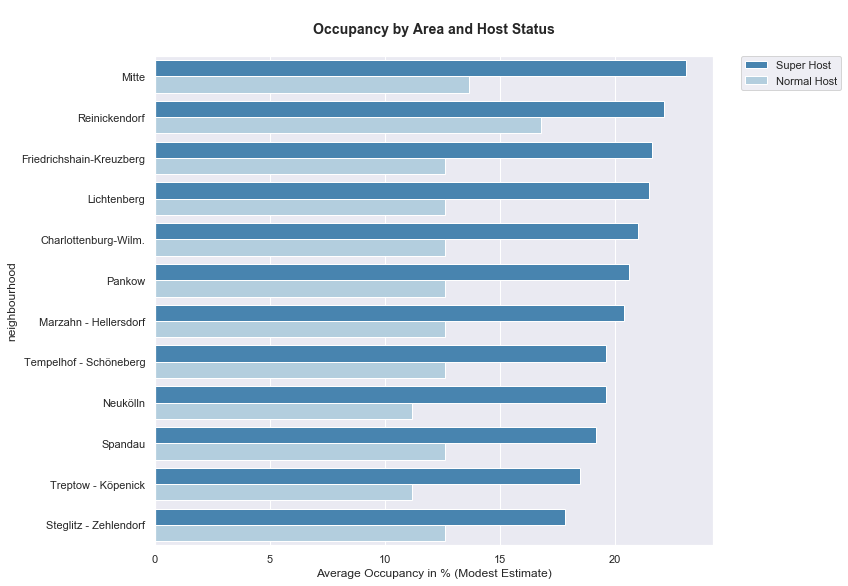

In [41]:
# group by neighbourhood and status, then take the median occupancy
df_grouped = pd.DataFrame(df.groupby(['neighbourhood', 'host_is_superhost'])['conservative_occupancy'].agg(np.median))
df_grouped.sort_values(by='conservative_occupancy', ascending=False, inplace=True)
df_grouped.reset_index(inplace=True)

# plot grouped dataframe
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x='conservative_occupancy', y='neighbourhood', hue='host_is_superhost', hue_order=['t', 'f'], 
            data=df_grouped, palette="Blues_r")

ax.set_title('\nOccupancy by Area and Host Status\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Average Occupancy in % (Modest Estimate)')

handles, labels = ax.get_legend_handles_labels()
ax.legend((handles), ('Super Host', 'Normal Host'), bbox_to_anchor=(1.05, 1), borderaxespad=0.);

In [44]:
# the overall median differences between superhosts and standard hosts
df.groupby('host_is_superhost')['conservative_income'].agg(np.median)

host_is_superhost
f     7862.4
t    12769.2
Name: conservative_income, dtype: float64

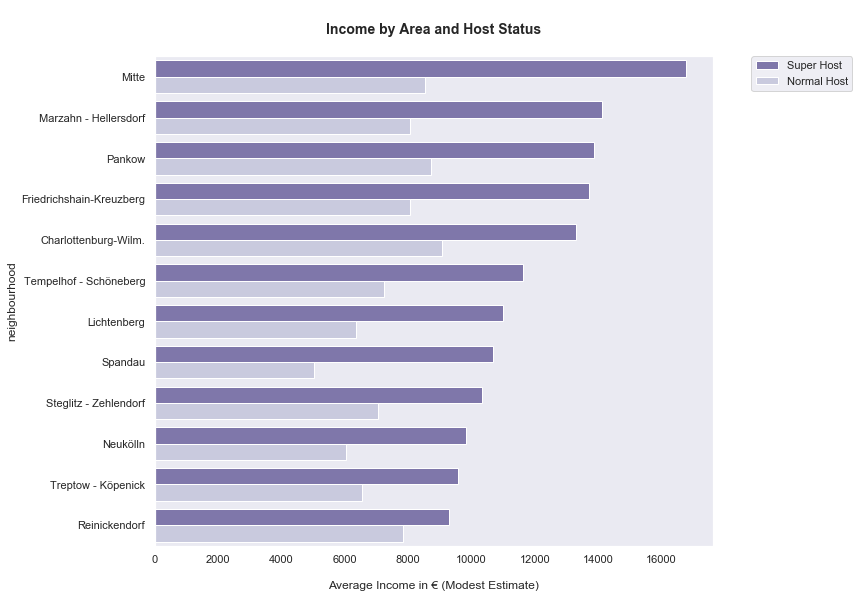

In [46]:
# group by neighbourhood and by status, then take the median income
df_grouped = pd.DataFrame(df.groupby(['neighbourhood', 'host_is_superhost'])['conservative_income'].agg(np.median))
df_grouped.sort_values(by='conservative_income', ascending=False, inplace=True)
df_grouped.reset_index(inplace=True)

# plot grouped dataframe
sns.set_style('dark')
fig, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x='conservative_income', y='neighbourhood', hue='host_is_superhost', hue_order=['t', 'f'], 
            data=df_grouped, palette="Purples_r")

ax.set_title('\nIncome by Area and Host Status\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Income in € (Modest Estimate)')

handles, labels = ax.get_legend_handles_labels()
ax.legend((handles), ('Super Host', 'Normal Host'), bbox_to_anchor=(1.25, 1), borderaxespad=0.);

#### It's definitely worth aspring to become a super host! The differences in occupancy and income are striking!

#### 4. Demand by Neighbourhood

Lollipop Charts with two observations

In [49]:
def lollipop_with_2(dataframe, about, y_col, x1_col, x2_col):
       
    sns.set_style("dark")
    
    # prepare data
    df_plot = dataframe[[y_col, x1_col, x2_col]].groupby(y_col).apply(lambda x: x.mean())
    df_plot.sort_values(x1_col, inplace=True)
    df_plot.reset_index(inplace=True)
        
    # draw plot
    fig, ax = plt.subplots(figsize=(10,8))
    ax.hlines (y=df_plot.index, xmin=df_plot[x1_col], xmax=df_plot[x2_col], color='grey', alpha=0.7, linewidth=2)
    ax.scatter(y=df_plot.index, x=df_plot[x1_col], s=75, color='skyblue', alpha=0.7, label=x1_col)
    ax.scatter(y=df_plot.index, x=df_plot[x2_col], s=75, color='darkblue', alpha=0.7, label=x2_col)
    ax.legend()
    
    # title, label, ticks and xlim
    ax.set_title('\nAverage ' + about + ' by District\n', fontdict={'size':12, 'weight':'bold'})
    ax.set_xlabel('\n' + about)
    ax.set_yticks(df_plot.index)
    ax.set_yticklabels(df_plot[y_col], rotation=0, 
                       fontdict={'horizontalalignment': 'right', 'size':12})
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

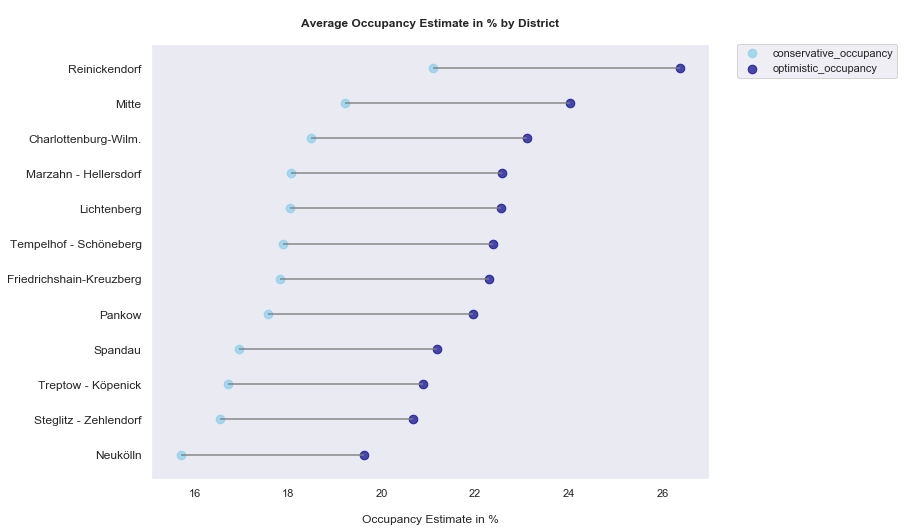

In [50]:
lollipop_with_2(df, 'Occupancy Estimate in %', 'neighbourhood', 'conservative_occupancy', 'optimistic_occupancy')

Unsurprisingly, Mitte is the most in-demand area; it's a hotspot, right in the center, and close to most places of interest. But why the heck is Reinickendorf at the top?

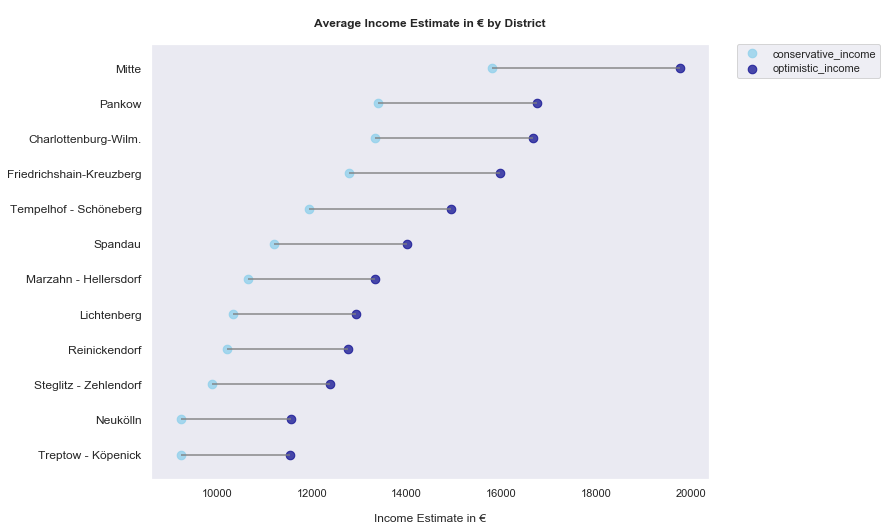

In [51]:
lollipop_with_2(df, 'Income Estimate in €', 'neighbourhood', 'conservative_income', 'optimistic_income')

It appears to be that Reinickendorf benefits from rather low room rates, which lead to a high occupancy - as seen above. When it comes to income, Mitte is on top of the list.

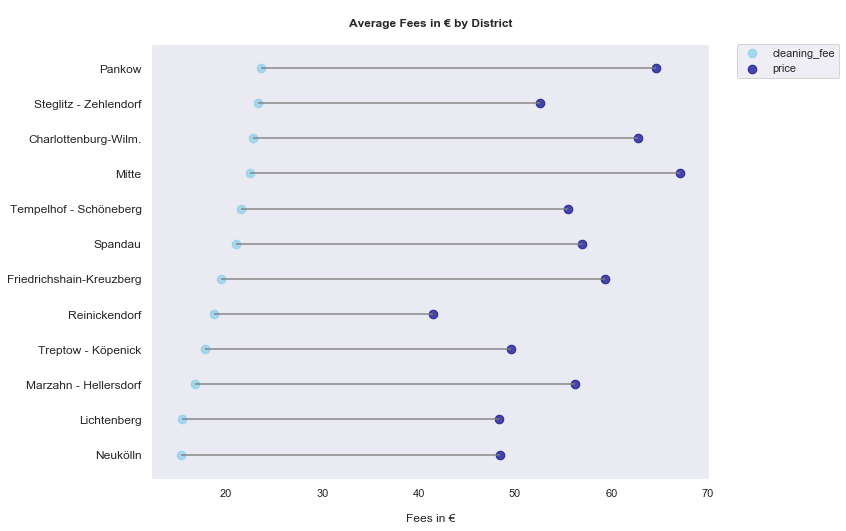

In [52]:
lollipop_with_2(df, 'Fees in €', 'neighbourhood', 'cleaning_fee', 'price')

Lollipop Charts with one observation and one group highlighted

In [53]:
def lollipop_with_highlight(dataframe, about, y_col, y_highlight, x_col):

    sns.set_style("dark")
    
    # prepare data
    df_plot = dataframe[[y_col, x_col]].groupby(y_col).apply(lambda x: x.mean())
    df_plot.sort_values(x_col, inplace=True)
    df_plot.reset_index(inplace=True)

    # highlight district specified as y highlight
    my_color = np.where(df_plot[y_col] == y_highlight, 'crimson', 'skyblue')
    my_size  = np.where(df_plot[y_col] == y_highlight, 70, 30)

    # draw plot
    fig, ax = plt.subplots(figsize=(8,8))
    ax.hlines (y=df_plot.index, xmin=0, xmax=df_plot[x_col], color=my_color, alpha=0.5, linewidth=2)
    ax.scatter(y=df_plot.index, x=df_plot[x_col], s=my_size, color=my_color, alpha=1, label=x_col)
    ax.legend()

    # title, label, ticks and xlim
    ax.set_title('\nAverage ' + about + ' by District\n', fontdict={'size':12, 'weight':'bold'})
    ax.set_xlabel('\n' + about)
    ax.set_yticks(df_plot.index)
    ax.set_yticklabels(df_plot[y_col], rotation=0, 
                       fontdict={'horizontalalignment': 'right', 'size':12})
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

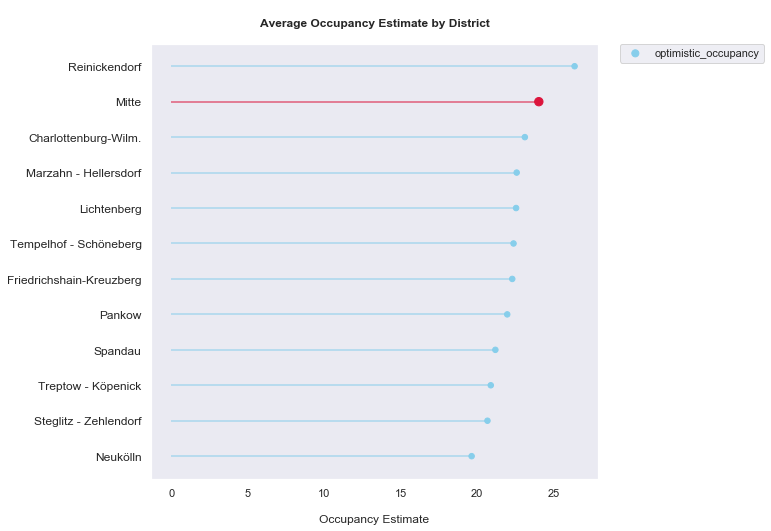

In [54]:
lollipop_with_highlight(df, 'Occupancy Estimate', 'neighbourhood', 'Mitte', 'optimistic_occupancy')

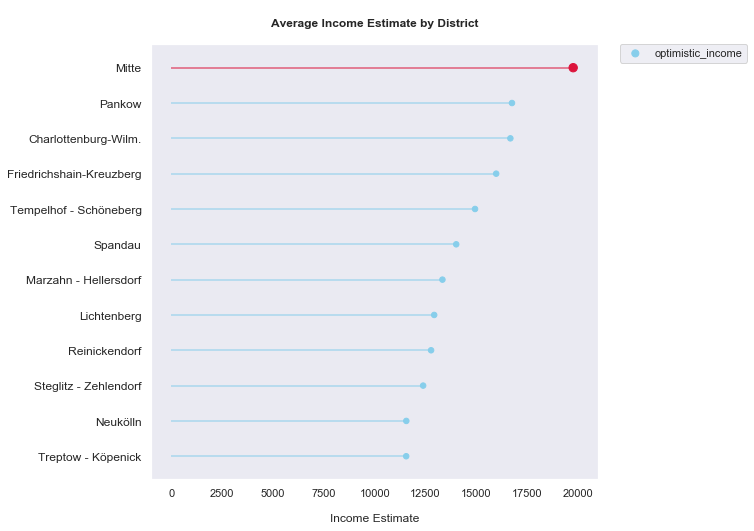

In [55]:
lollipop_with_highlight(df, 'Income Estimate', 'neighbourhood', 'Mitte', 'optimistic_income')

#### 5. Demand by Capacity

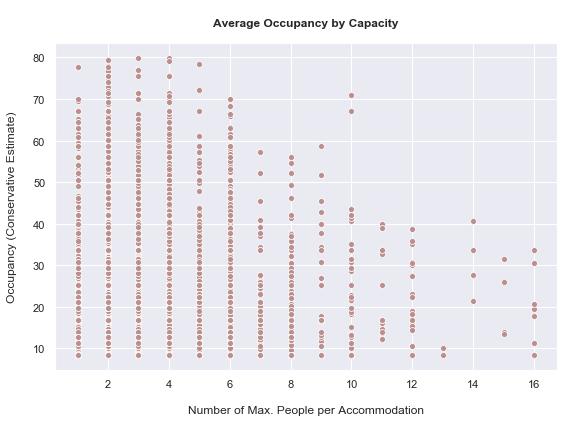

In [56]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(9,6))

sns.scatterplot(x="accommodates", y="conservative_occupancy", color='rosybrown',  data=df)

plt.title('\nAverage Occupancy by Capacity\n', fontsize=12, fontweight='bold')
plt.xlabel('\nNumber of Max. People per Accommodation')
plt.ylabel('Occupancy (Conservative Estimate)\n');

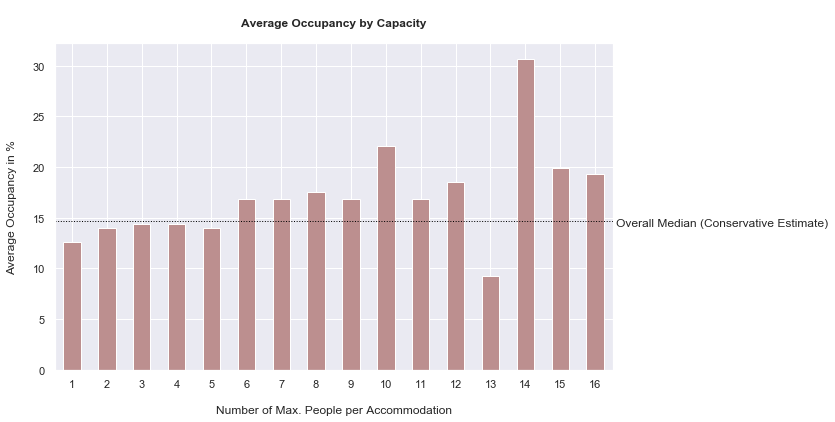

In [57]:
# group by accomodates and plot median occupancy
df.groupby('accommodates')['conservative_occupancy']\
                          .median()\
                          .plot(kind='bar', figsize=(10,6), color='rosybrown')

# beautify the plot!
plt.xlabel('\nNumber of Max. People per Accommodation', fontsize=12)
plt.xticks(rotation='horizontal')
plt.ylabel('Average Occupancy in %\n', fontsize=12)
plt.title('\nAverage Occupancy by Capacity\n', fontsize=12, fontweight='bold')

# draw and label the median value
plt.axhline(y=14.7, xmin=0, xmax=1, linewidth=1, linestyle=':', color='black')
plt.text(x=15.6, y=14.2, s='Overall Median (Conservative Estimate)');

Generally, bigger homes seem to be sold more often than smaller ones. Perhaps this is due to the fact that a group might be able to save more money than 1-2 persons would by using Airbnb. It follows that accommodations with a bigger capacity enjoy greater popularity.

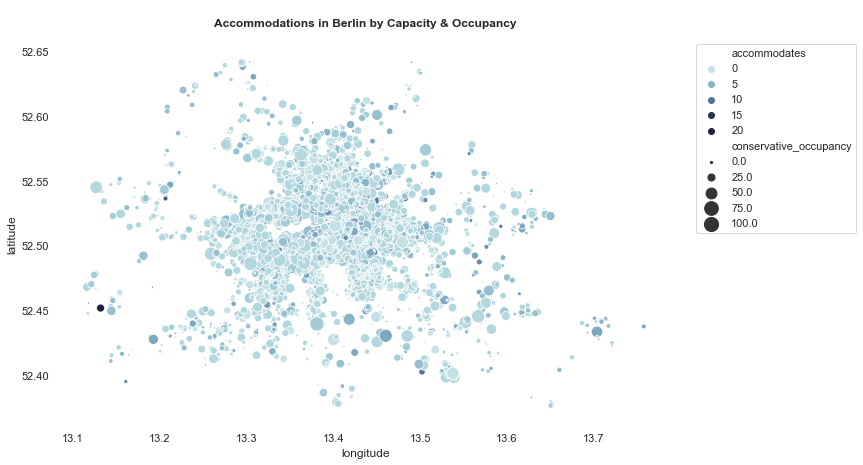

In [58]:
# prepare plot
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,7))

# draw scatter plot
ax = sns.scatterplot(x="longitude", y="latitude", size='conservative_occupancy', sizes=(5, 200),
                     hue='accommodates', palette=cmap,  data=df)
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nAccommodations in Berlin by Capacity & Occupancy\n', fontsize=12, fontweight='bold')

# remove spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

### Interpreting the Data

> Seasonality:

The high season for lodgings in Berlin is during late spring and early summer (specifically from May to July) and during the autumn months September and October. You could use your apartment yourself during the rest of year and offer it in these periods to get the most out of it.

> Super Host:

To be a superhost is to be a cash machine. The occupancy rate in superhost lodgings is almost twice as high as in standard host lodgings, and the income is 60% higher.

> Location:

If you don't want to live in the vibrant, loud center of Berlin yourselves - well, that's bad luck for you! That's precisely where tourists are looking to to rent Airbnb accommodations, particularly in Mitte or Charlottenburg, and are willing to pay more for them than for lodgings in outlying districts.

> Capacity:

Travelers in (bigger) groups benefit much more from how much they save by using Airbnb than couples or small groups do. That implies that lodgings accommodating 6+ people tend to be more in-demand than smaller ones.